In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib 
# %matplotlib notebook

In [2]:
rng = np.random.default_rng(2)

In [3]:

df = pd.read_csv('../data/snafu_sample.csv', dtype={'category':'category'})
idlist=df.id.rename('idlist').str.cat(df.listnum.astype(str))
df = df.assign(
    item=df['item']
     .str.replace('aligator', 'alligator')
     .str.replace('^a+rdva+rk', 'aardvark')
     .str.replace('baboob', 'baboon')
     .str.replace('antaloupe', 'antelope'),
    idlist=idlist
)
df=df.set_index([idlist, 'item'], drop=False)
df
# df.set_index(idlist, name='idlist')
# df.query('category=="animals"')['item'].sort_values().unique().tolist()

/tmp/ipykernel_688955/3195993138.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('^a+rdva+rk', 'aardvark')


id  listnum category           item     RT  RTstart  \
idlist item                                                                   
A1010  strawberry     A101        0   fruits     strawberry  67072    67072   
       kiwi           A101        0   fruits           kiwi      0    67072   
       banana         A101        0   fruits         banana      0    67072   
       pineapple      A101        0   fruits      pineapple      0    67072   
       apple          A101        0   fruits          apple      0    67072   
...                    ...      ...      ...            ...    ...      ...   
C1508  chickenstrips  C150        8    foods  chickenstrips   6909   152000   
       cheeseburger   C150        8    foods   cheeseburger   4269   156269   
       meatloaf       C150        8    foods       meatloaf   6249   162518   
       jumbalaya      C150        8    foods      jumbalaya   5809   168327   
       sausage        C150        8    foods        sausage   9663   177990   

                            group idlist  
idlist item                               
A1010  strawberry     Experiment1  A1010  
       kiwi           Experiment1  A1010  
       banana         Experiment1  A1010  
       pineapple      Experiment1  A1010  
       apple          Experiment1  A1010  
...                           ...    ...  
C1508  chickenstrips  Experiment3  C1508  
       cheeseburger   Experiment3  C1508  
       meatloaf       Experiment3  C1508  
       jumbalaya      Experiment3  C1508  
       sausage        Experiment3  C1508  

[24572 rows x 8 columns]

In [11]:


# idlist=df.id.str.cat(df.listnum.astype(str))
# idlist
animals = (df
#  .assign(idlist=idlist)
#  [df.item.isin((df.item.value_counts()>20).index.tolist())]#index.tolist())]

#  [df.item.isin((df.item.value_counts().pipe(lambda s: s[s>20])).index.tolist())]
 .query('category=="animals"')#[['idlist','item']]
 .assign(animals=1.)['animals']
#  .set_index(['idlist','item'])
 .pipe(lambda df: df[~df.index.duplicated(keep='first')])
 .unstack().fillna(0.)#.drop_levels(0)
 .pipe(lambda df: df.loc[:,df.sum()>50])
)

all_X = animals.values
animals

item,cheetah,lion,hyena,parrot,cat,giraffe,elephant,hippopotamus,monkey,shark,...,chimpanzee,kangaroo,seal,sheep,crocodile,alligator,flamingo,panther,lizard,spider
idlist,,,,,,,,,,,,,,,,,,,,,
A1012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1015,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1018,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1020,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1023,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1494,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1496,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1502,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4

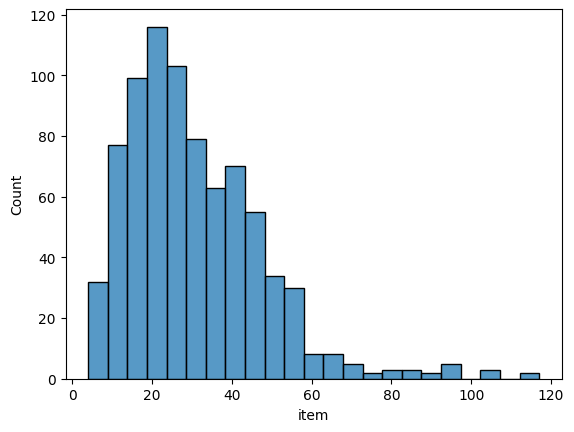

In [12]:
sns.histplot(df.groupby(level=0).item.count())
(df.groupby(level=0).item.count()).min()

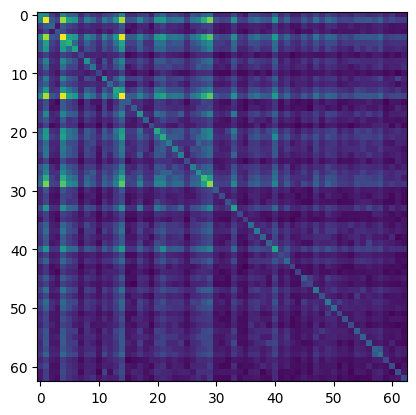

In [13]:
plt.imshow(animals.T@animals)

In [14]:
# sliding_window()
from numpy.lib.stride_tricks import as_strided, sliding_window_view
def arr_cooc(x, n=2):
    # print(x.strides)
    # return as_strided(x, shape=(x.shape[0], n), strides=x.strides*2)
    # print(x.shape)
    return sliding_window_view(x,min(n, x.shape[0]))
# as_strided(df.item.values, shape=(df.length,2), strides=
# (arr_cooc(df.item.values, 3))
# df.groupby(level=0)['item']
animal_occ = (df
#  [df.item.isin(df.item.value_counts(ascending=False).head(100).index.tolist())]
#  [df.item.isin((df.item.value_counts().pipe(lambda s: s[s>20])).index.tolist())]
 .query('category=="animals"')
 .item.astype('category')
)
dummies = np.eye(animal_occ.dtype.categories.shape[0])
roll_X=np.vstack([dummies[arr_cooc(g[1].values, n=10),:].max(axis=1) for g in animal_occ.cat.codes.groupby(level=0)])#[:,]
roll_X = roll_X[:,animal_occ[animal_occ.isin(animals.columns.tolist())].cat.codes.unique()]
# print(animal_occ.cat.codes.sort_values())
# print(animal_cooc.max(axis=0))
# animal_cooc.astype(int).sum(axis=1)
# roll_X=np.array([dummies[ix] for ix in animal_cooc.T])#.sum(axis=1)
# roll_X = roll_X.astype(bool).max(axis=0)
# animal_occ
# animal_occ.cat.codes
# np.eye(animal_occ.dtype.categories.shape[0])[animal_cooc[0]].shape
# animal_occ.cat.codes.unique()
# roll_animals=
# plt.spy(roll_X)
# dummies[arr_cooc(animal_occ.cat.codes.values, n=3)].max(axis=1)#.shape#.shape#max(axis=0)#.sum(axis=0)#.max(axis=0)
roll_X.shape
# animal_occ[animal_occ.isin(animals.columns.tolist())].cat.codes.values

(8124, 63)

<Axes: ylabel='Density'>

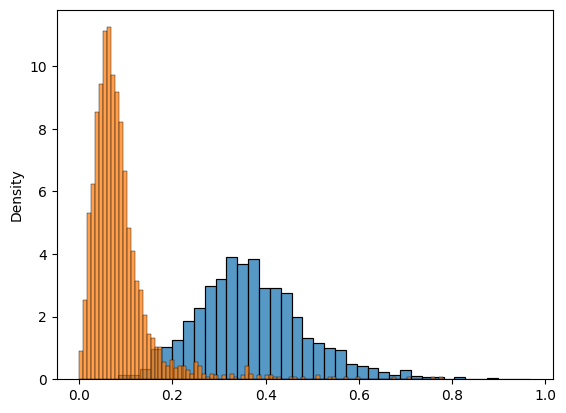

In [15]:
from affinis.associations import ochiai, resource_project, chow_liu, coocur_prob, mutual_information
from affinis.utils import _sq

sns.histplot(_sq(ochiai(all_X, pseudocts=0.5)), stat='density')
sns.histplot(_sq(ochiai(roll_X, pseudocts=0.5)), stat='density')
# sns.displot(_sq(resource_project(X)))

True

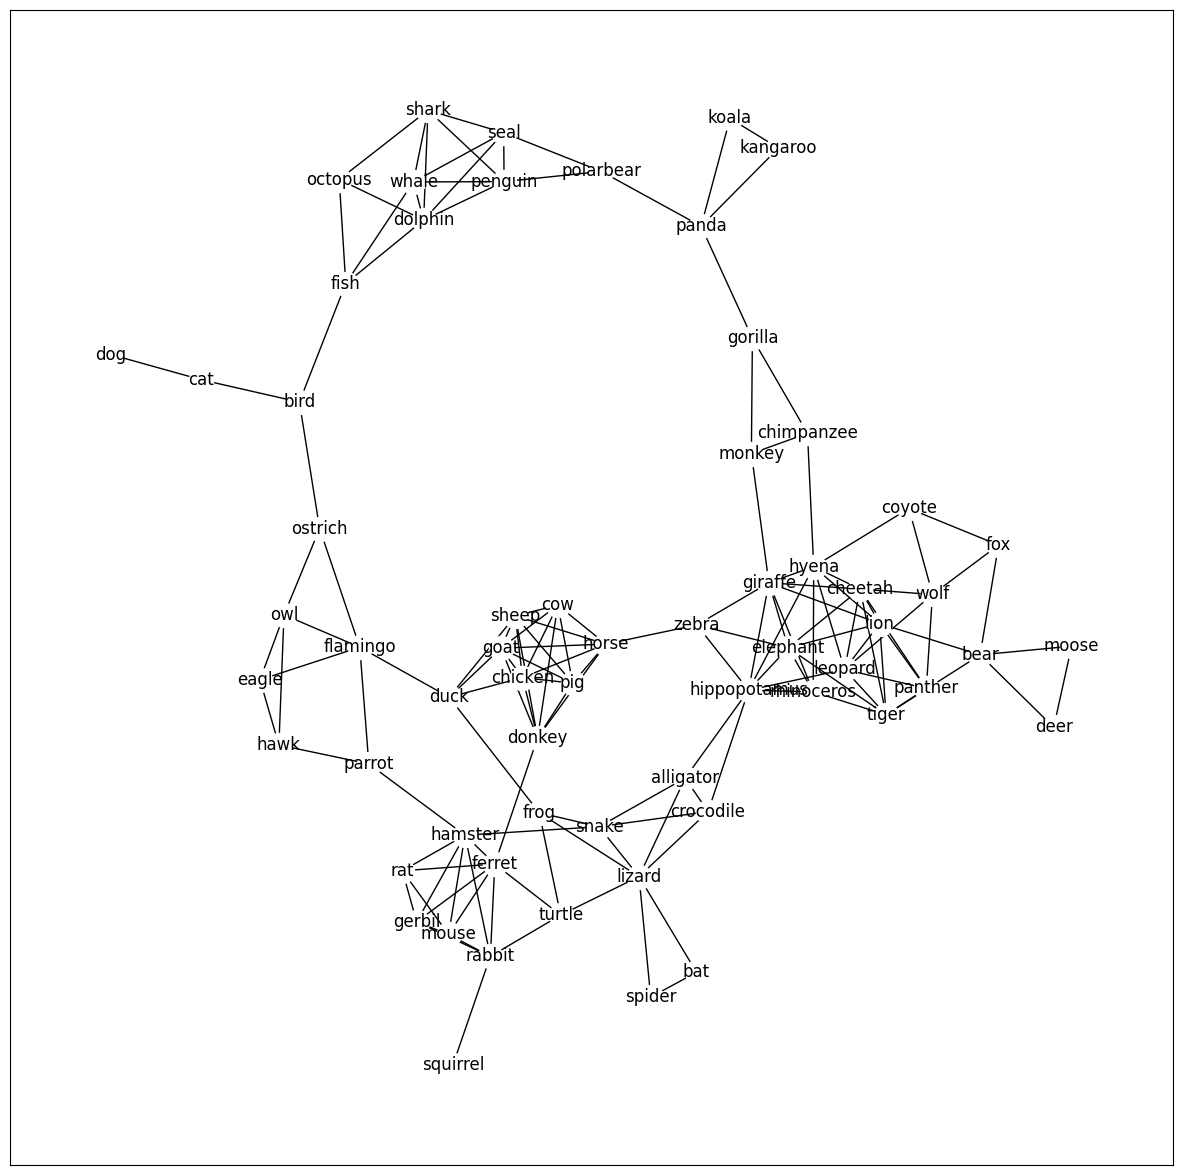

In [16]:
import networkx as nx

from affinis.filter import min_connected_filter
import scipy.sparse as sprs
from affinis.distance import bilinear_dists, generalized_graph_dists
from affinis.proximity import sinkhorn, forest
from affinis.utils import _norm_diag, edge_mask_to_laplacian, _outer

# X = all_X
X = roll_X

def top_tree_pct(x, mult=1):
    pct=np.percentile(_sq(x), 100-100*mult*2/x.shape[0])
    print(pct)
    return x>=pct
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(_sq(~(min_connected_filter(_sq(sinkhorn(ochiai(X)))).mask)), index=animals.columns, columns=animals.columns))
# pos_cos = nx.kamada_kawai_layout(G, dist = pd.DataFrame(-np.log(ochiai(X)), columns=animals.columns, index=animals.columns).to_dict())
pos_cos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos_cos, node_color='w')
nx.connected.is_connected(G)

In [262]:
(lambda o: o/(1+o))(-_sq(GraphicalLasso().fit(X).get_precision()))


array([ 0.61071322,  0.        , -0.        , ..., -0.        ,
        0.        ,  0.        ])

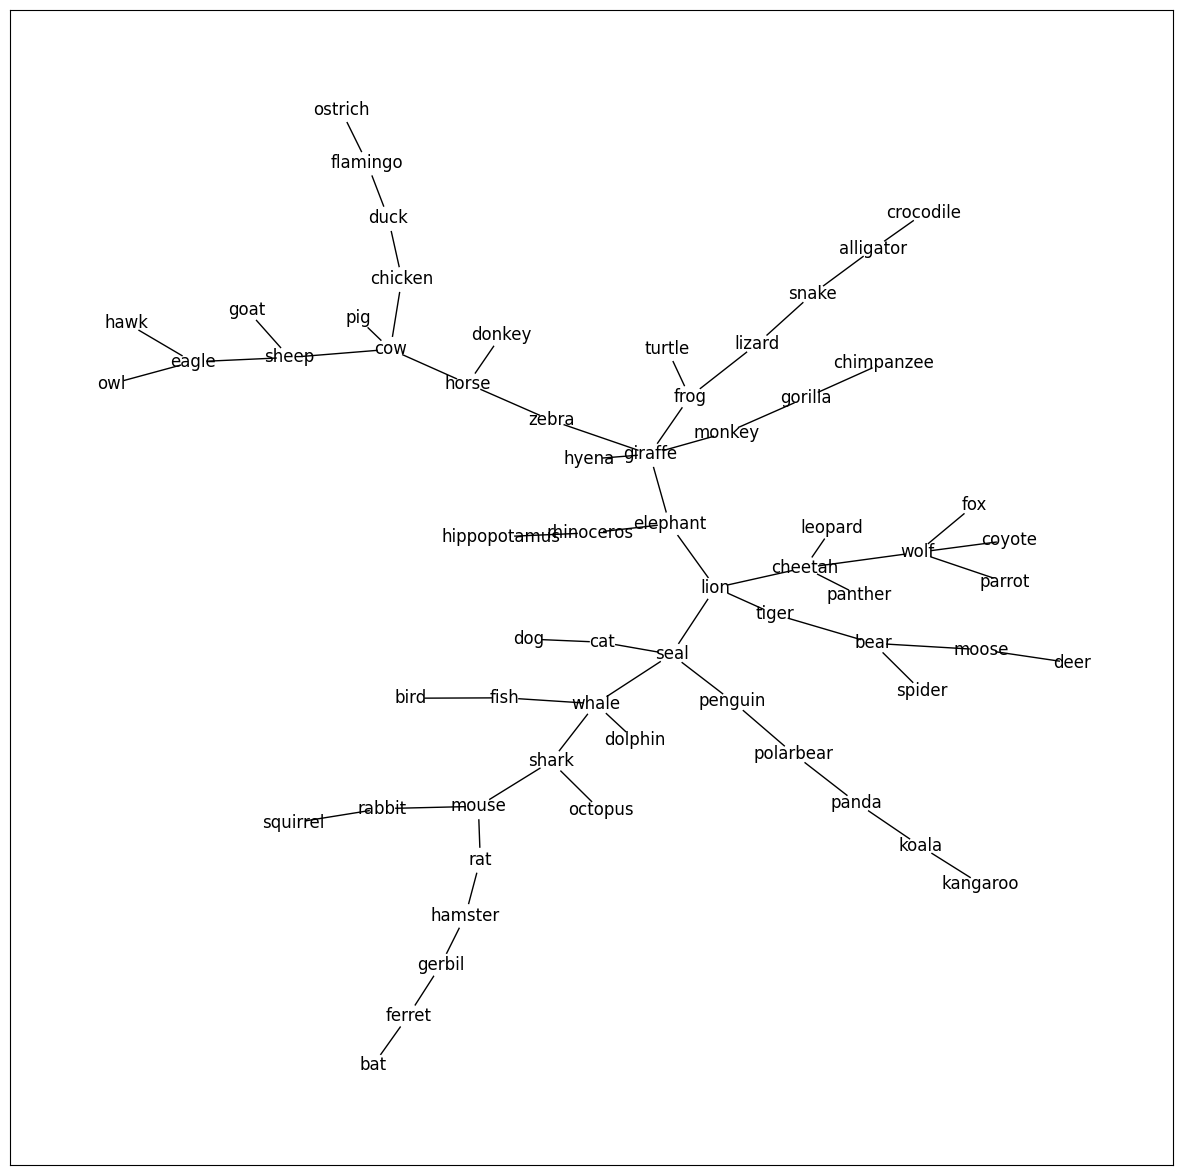

In [17]:
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(chow_liu(X, pseudocts=0.5), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')

In [266]:
from sklearn.covariance import GraphicalLasso
# graphical_lasso()
plt.figure(figsize=(15,15))
glasso = (lambda o: o/(1+o))(-_sq(GraphicalLasso().fit(X).get_precision()))
G = nx.from_pandas_adjacency(pd.DataFrame(_sq(~(min_connected_filter(-_sq(glasso)).mask)), index=animals.columns, columns=animals.columns))
# pos_cos = nx.kamada_kawai_layout(G, dist = pd.DataFrame(-np.log(ochiai(X)), columns=animals.columns, index=animals.columns).to_dict())
pos_cos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos_cos, node_color='w')
nx.connected.is_connected(G)

ValueError: shape mismatch: value array of shape (63,63) could not be broadcast to indexing result of shape (55,)

<Figure size 1500x1500 with 0 Axes>

In [18]:


def get_mask(e_pmf,idx):
    return sprs.coo_array(_sq(e_pmf)*np.multiply.outer(idx,idx))

def unroll_node_obs(X): 
    trirow, tricol = np.triu_indices(n=X.shape[1],k=1)
    return np.einsum('ij,ik->ijk', X, X)[:,trirow, tricol]

def obs_mask_dists(X,d):
    n = X.shape[0]    
    mask = unroll_node_obs(X)
    return np.ma.masked_array(np.multiply.outer(np.ones(n), _sq(d)), mask=~(mask.astype(bool)))

def masked_subset_mst(x_d):
    A = _sq(x_d.compressed())
    T = sprs.csgraph.minimum_spanning_tree(A).todense()
    x_t = np.zeros_like(x_d)
    x_t[~x_d.mask] = _sq(T)
    return x_t

# est_dists = bilinear_dists(sinkhorn(_norm_diag(coocur_prob(roll_X, pseudocts=0.5))))
# est_dists = bilinear_dists(mutual_information(X, pseudocts=0.5))
est_dists = -np.log(ochiai(sprs.csr_array(X), pseudocts=0.5))

# masked_dists = np.ma.array(np.multiply.outer(np.ones(roll_X.shape[0]), _sq(ochiai(roll_X))), mask=unroll_node_obs(~roll_X.astype(bool)))
# masked_dists=obs_mask_dists(X, est_dists)
# masked_subset_mst(masked_dists[0])
# for n,i in enumerate(masked_dists):
#     # print(i.count(), (_sq(np.multiply.outer(roll_X[n], roll_X[n]))).sum(), roll_X[n].sum())
#     print(masked_subset_mst(i)>0)
# _sq(sprs.csgraph.minimum_spanning_tree(_sq(masked_dists[0].compressed())).todense())
# unroll_node_obs(roll_X).shape, np.multiply.outer(np.ones(roll_X.shape[0]), _sq(est_dists)).shape
# masked_dists[1]
# (lambda x: (x,(x**2-x)/2.))(_outer(np.multiply, roll_X[2]).sum())
# (unroll_node_obs(roll_X)[1].astype(bool)).sum()

In [19]:
from affinis.distance import adjusted_forest_dists
# # # %%timeit
# E_obs=sprs.coo_array([
#     # masked_subset_mst(i) for i in masked_dists
#     _sq(sprs.csgraph.minimum_spanning_tree(
#         get_mask(_sq(est_dists),i)
#     ).todense()>0) 
#     # for i in animals.values
#     for i in X
# ])

# add_pmf = (E_obs.sum(axis=0)+0.5)/(E_obs.shape[0]+1)


# # # mst_post = E_obs.shape[0]*(E_obs.sum(axis=0)+0.5)*_sq(coocur_prob(X, pseudocts=0.5))/(_sq(X.T@X)+1)
# # evd_L = (E_obs.sum(axis=0)+0.5)/(unroll_node_obs(X).sum(axis=0)+1)
# evd_L = (E_obs.sum(axis=0)+0.5)/_sq(X.T@X+1.)
# # # mst_post = X.shape[1]*(E_obs.sum(axis=0)+0.5)*_sq(coocur_prob(X, pseudocts=0.5))/(_sq(X.T@X)+1)
# mst_post = X.shape[0]*evd_L*_sq(coocur_prob(X, pseudocts=0.5))
# # # post_L = -_sq(_norm_diag(np.diag(np.sum(_sq(post_L), axis=1))-_sq(post_L)))
# post_L
from affinis.associations import spanning_forests_edge_prob, spanning_forests_edge_rate
evd_L = _sq(spanning_forests_edge_prob(sprs.csr_array(X)))
mst_post = evd_L*X.shape[0]
post_L=evd_L*_sq(adjusted_forest_dists((lambda a: np.diag(a.sum(axis=0))-a)(_sq(evd_L)), beta=100))
# post_L = _sq(spanning_forests_edge_rate(X))


In [197]:
# spanning_forests_edge_prob(sprs.csr_array(X))
# _sq(E_obs.sum(axis=0))
# _sq(unroll_node_obs(X).sum(axis=0)), X.T@X

$P(y|x) = \frac{P(Y\bigcap X)}{P(X)}$

$P(x|y) = \frac{P(Y\bigcap X)}{P(Y)}$

so if $X\subset Y$, then $P(Y\bigcap X)=P(X)$ and $P(X|Y) = \frac{P(X)}{P(Y)}$ and 

$P(X) = P(X|Y)P(Y)$

let X be "probability of an interraction" and Y be "probability of a co-occurrence", we can measure that right side via spanning tree bootstraps, to estimate the left. 

Alternatively, if the co-occurrences are treated as rates (say, counts in a poisson or negative binomial), then we are alternatively deriving our estimate as the thinning parameter for each 

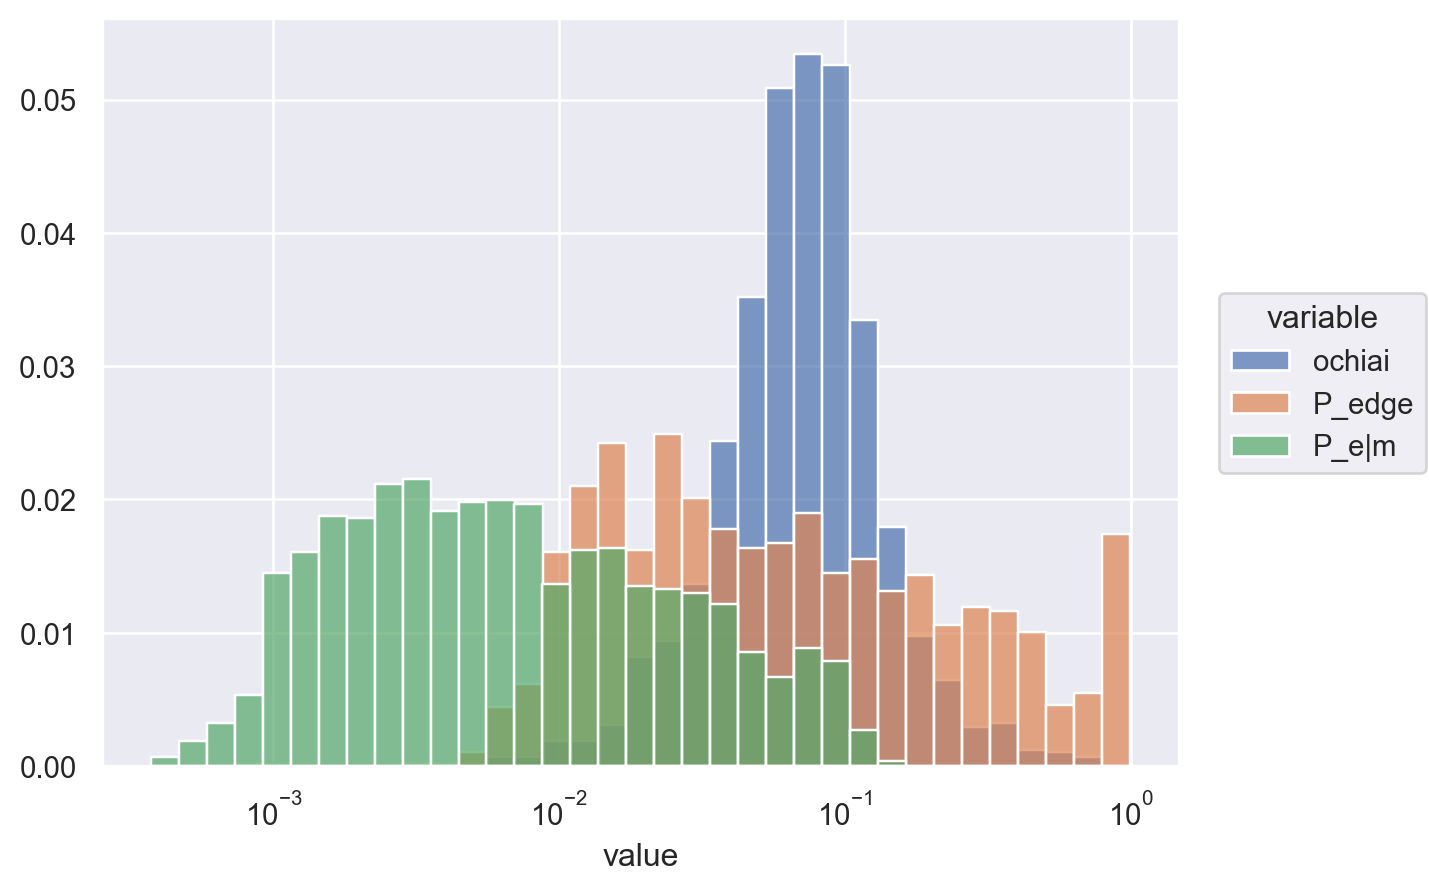

In [20]:
# mst_post/X.shape[1], 
import seaborn.objects as so
from affinis.utils import edge_mask_to_laplacian
# _sq(coocur_prob(X,pseudocts=0.5))*(E_obs.sum(axis=0)+0.5)/(unroll_node_obs(X).sum(axis=0)+1)
# sns.heatmap(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post))))
# sns.histplot(np.ma.masked_less( -_sq(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post)))),0.1))
# sns.histplot(mst_post,discrete=True)
# mst_post

# for scores in [
so.Plot(pd.DataFrame({
    'ochiai': _sq(ochiai(X, pseudocts=0.5)),
    'P_edge': evd_L,
    # mst_post,
    'P_e|m': post_L,
}).melt(), x='value', color='variable'
).add(
    so.Bars(), 
    so.Hist(stat='proportion'), 
    # so.Stack() 
).scale(x='log')
# ]:
    # sns.histplot(scores, stat='density', log_scale=True, element='step', fill=False)
    # sns.histplot(np.ma.masked_less(evd_L, 0.01), stat='density', log_scale=True)
# sns.histplot()
# sns.histplot(np.ma.masked_less(post_L, 0.01), stat='density', log_scale=True)
# sns.histplot(_sq(ochiai(X, pseudocts=0.5)), stat='density', log_scale=True)
# sns.histplot(np.ma.masked_less(_sq(_norm_diag(forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1))), 0.1), stat='density')

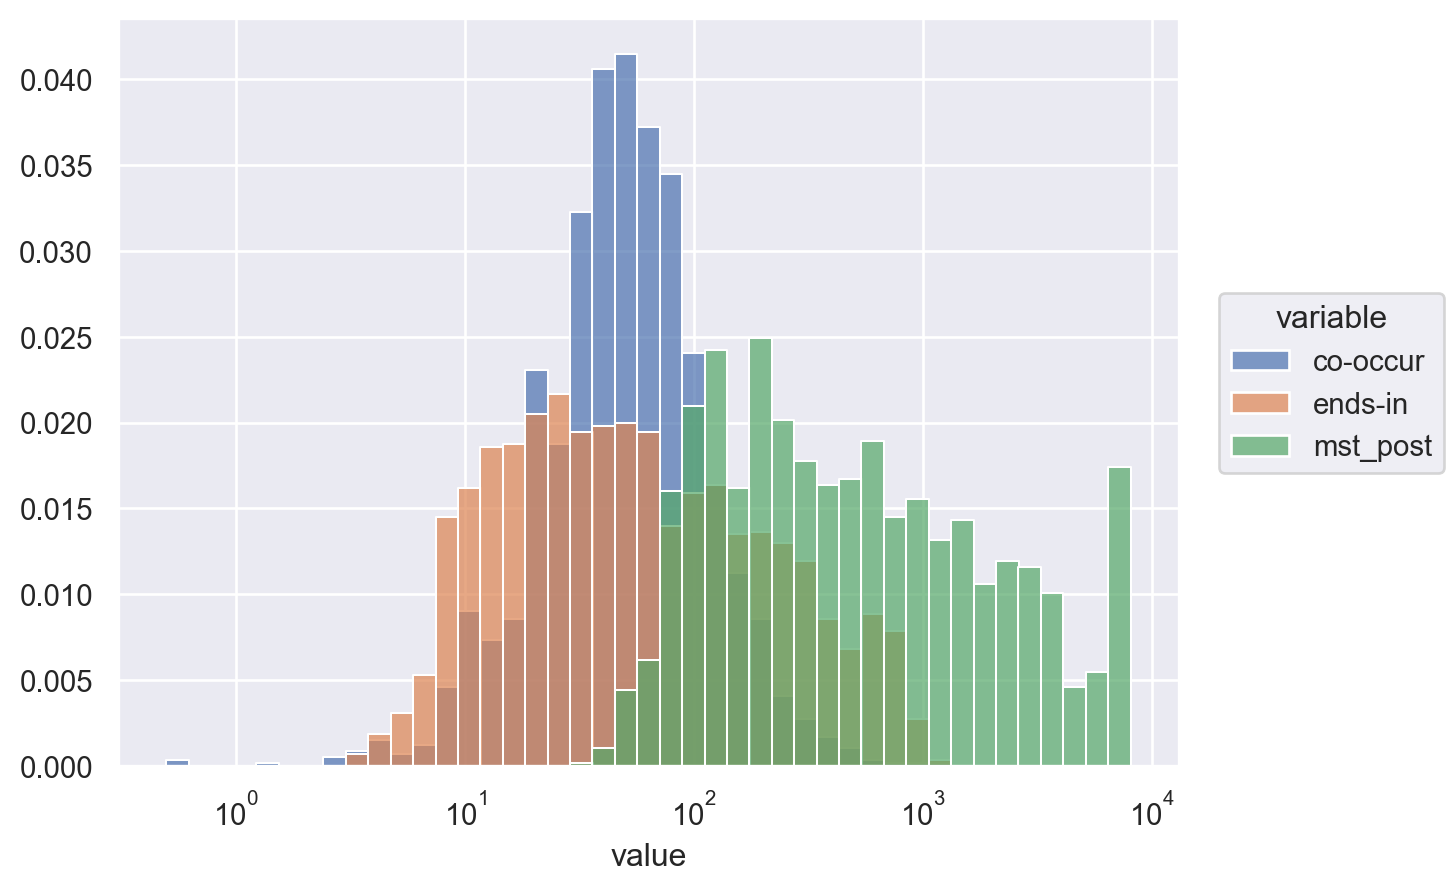

In [21]:
# np.sort(X.shape[0]*post_L)
so.Plot(pd.DataFrame({
    'co-occur': X.shape[0]*_sq(coocur_prob(X, pseudocts=0.5)),
    'ends-in': X.shape[0]*post_L,
    'mst_post': mst_post,
    # 'same-tree': X.shape[0]*_sq(_norm_diag(forest((lambda a: np.diag(a.sum(axis=0))-a)(_sq(evd_L)), beta=1))),
}).melt(), x='value', color='variable'
).add(
    so.Bars(), 
    so.Hist(stat='proportion'), 
    # so.Stack() 
).scale(x='log')

# sns.histplot(_sq(X.T@X), log_scale=True)
# sns.histplot(X.shape[0]*post_L, log_scale=True, fill=False)
# sns.histplot(X.shape[0]*_sq(_norm_diag(forest((lambda a: np.diag(a.sum(axis=0))-a)(_sq(evd_L)), beta=5))))

/home/tbsexton/.pyenv/versions/affinis/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/tbsexton/.pyenv/versions/affinis/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


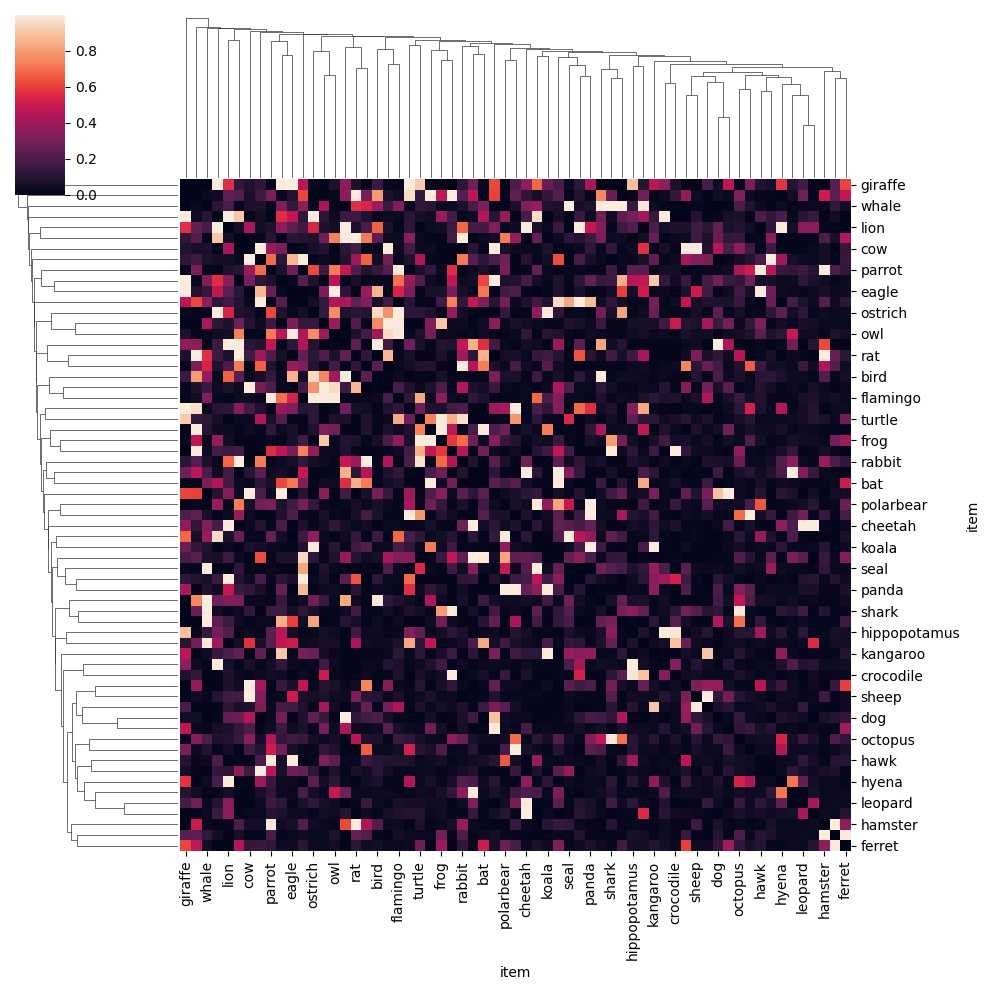

In [22]:
sns.clustermap(pd.DataFrame(_sq(evd_L), columns=animals.columns, index=animals.columns), 
               # mask = _sq(min_connected_filter(evd_L).mask)
              )
# sns.heatmap(_norm_diag(1-forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1)))
# sns.heatmap(forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1)/np.sqrt(1-_outer(np.multiply, 1-np.diag(forest(edge_mask_to_laplacian(np.ma.masked_less(evd_L, 0.1)), beta=1)))))

In [23]:
# pd.DataFrame(_sq(evd_L), columns=animals.columns, index=animals.columns).to_dict()
# pd.Series.to_dict()

In [209]:
# _sq(min_connected_filter(_sq(Gvals:=(_sq(evd_L)))).filled(0))
Gthres

masked_array(data=[0.9990476190476191, --, --, ..., --, --, --],
             mask=[False,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20)

True

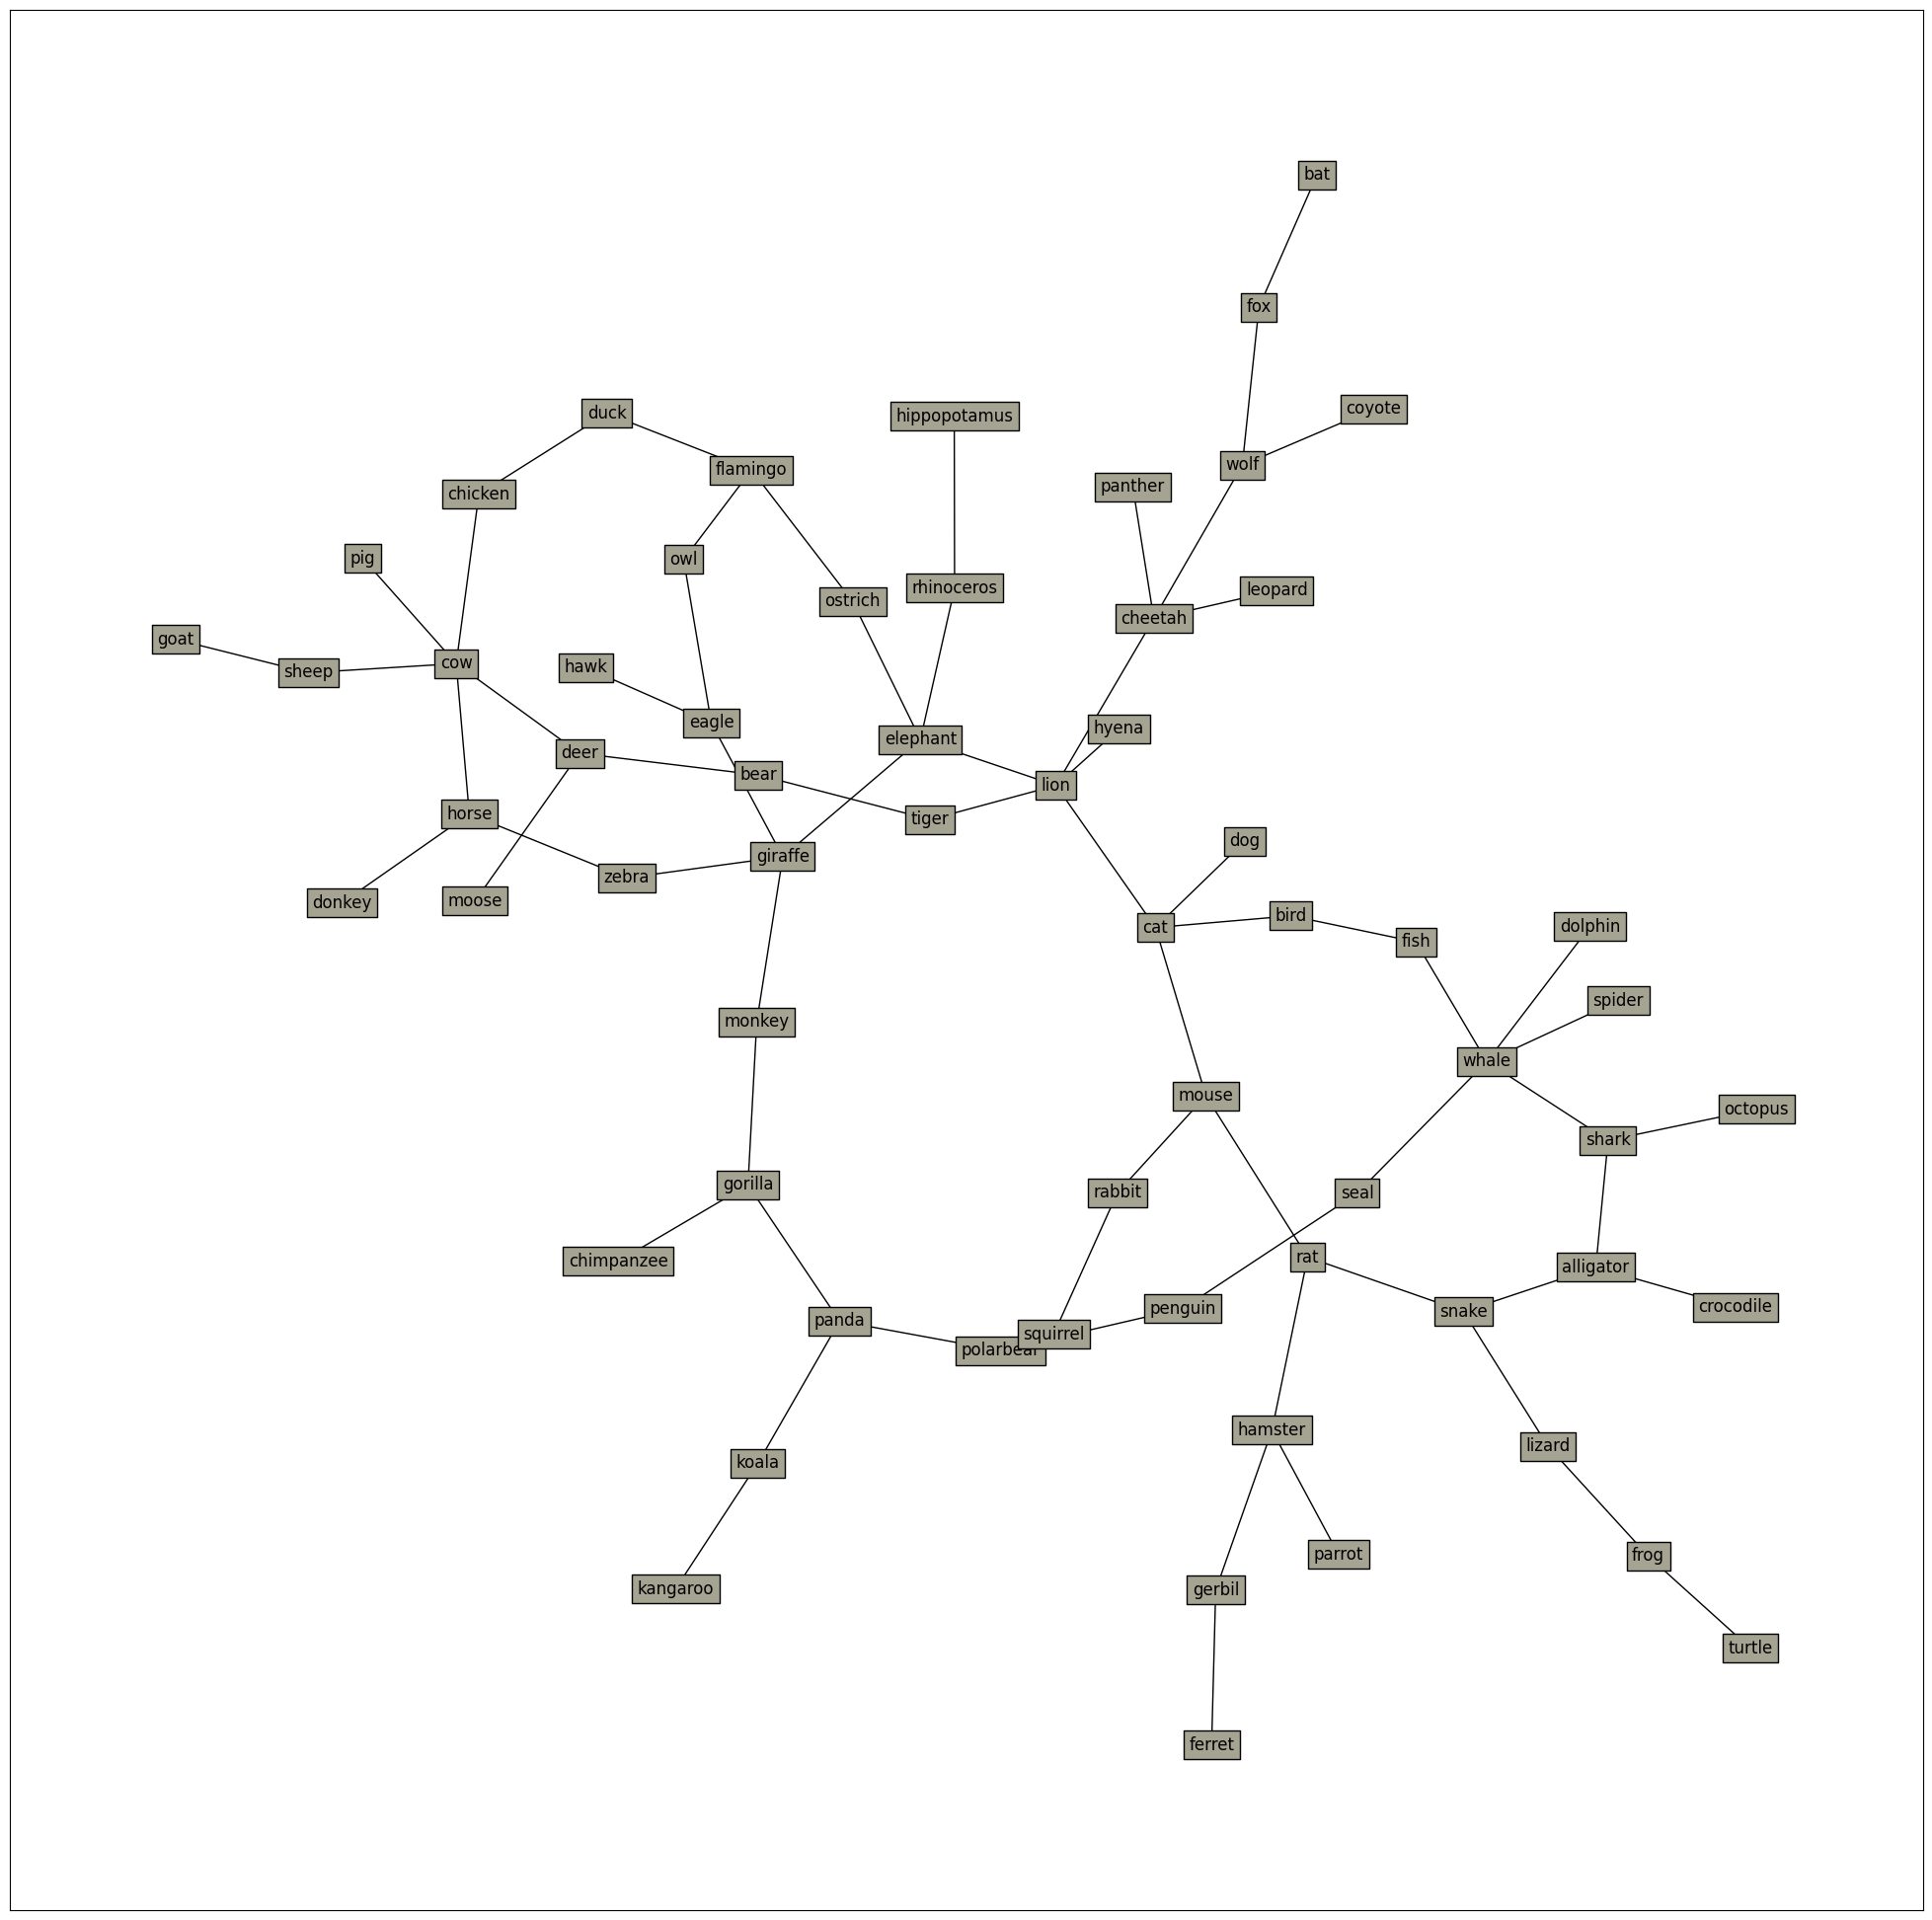

In [235]:
f = plt.figure(figsize=(25,25))

# G = nx.from_pandas_adjacency(pd.DataFrame((minmax(sinkhorn(_sq(post_L)))>0.7).astype(int), index=animals.columns, columns=animals.columns))
# G = nx.from_pandas_adjacency(pd.DataFrame(_sq(_sq(top_tree_pct(_sq(post_L), mult=1.5))), index=animals.columns, columns=animals.columns))
Gthres = min_connected_filter(_sq(Gvals:=(_sq(evd_L))))
G = nx.from_pandas_adjacency(pd.DataFrame(_sq(Gthres.filled(0)), index=animals.columns, columns=animals.columns))
Gneg = nx.from_pandas_adjacency(pd.DataFrame(
    _sq(3*(threshold_edges_filter(_sq(Gvals), 0.9) - Gthres.min()).filled(0) + 0.5*Gthres.filled(0)),
    index = animals.columns, columns = animals.columns,
))
# pos = nx.kamada_kawai_layout(G, dist=pd.DataFrame(_sq(-np.log(evd_L)), columns=animals.columns, index=animals.columns).to_dict())
# pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G, iterations=1000, k=2)

nx.draw_networkx_edges(G, pos=pos)
# mx.
nx.draw_networkx_labels(G, pos=pos, bbox = dict(facecolor = "xkcd:cement", edgecolor=None, joinstyle='round'))
# plt.savefig('animals.svg')
# list(G.neighbors('spider'))
nx.connected.is_connected(G)
# fig



In [270]:
A=_sq(_sq(X.T@X))

A.argmax(axis=0)
A.max(axis=0)

array([ 524., 1096.,  198.,  121.,  899.,   58.,  419.,  441.,  177.,
        362.,  416.,   82.,  177.,  259.,  342.,  380.,  899.,  152.,
        208.,  571.,  230.,  161.,  154.,  149.,  501.,  182.,  791.,
         83.,   99.,  541.,  326.,  391.,  190.,   87.,   82.,   82.,
        187.,   93.,  235.,  326.,  247.,   73.,  541.,  480.,   75.,
       1096.,  190.,  109.,  267.,  571.,  142.,  219.,   67.,   65.,
        362.,  217.,   99.,  154.,  107.,  311.,  791.,  308.,  332.,
        136.,   82.,  171.,   79.,  329.,  329.,  254.,  280.,  306.,
        168.,  168.,  306.,   52.,   99.,  151.,  240.,  280.,  150.,
        267.,   82.,  311.,   95.,  105.,   92.,   71.,   55.,   82.,
        578.,  578.,  247.,  152.,  152.,   64.,   92.,  118.,  103.,
        133.,  187.,  259.,  113.,  113.,  171.,  190.,  225.,   48.,
        259.,   90.,  123.,  110.,  170.,   82.,  121.,   77.,   95.,
         74.,   92.,   37.,   82.,   95.,  136.,   49.,   72.,   76.,
         57.,  136.,

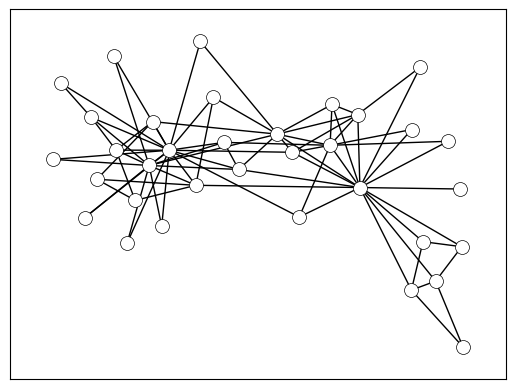

In [72]:
nx.draw_networkx_nodes(
    K:=nx.karate_club_graph(), pos=(testpos:=nx.spring_layout(K)), 
    node_color='white', edgecolors='k', 
    node_size=100, linewidths=0.5,
)
nx.draw_networkx_edges(
    K, pos=testpos,
)

{0: 'cheetah',
 1: 'lion',
 2: 'hyena',
 3: 'parrot',
 4: 'cat',
 5: 'giraffe',
 6: 'elephant',
 7: 'hippopotamus',
 8: 'monkey',
 9: 'shark',
 10: 'rhinoceros',
 11: 'snake',
 12: 'leopard',
 13: 'zebra',
 14: 'dog',
 15: 'bird',
 16: 'fish',
 17: 'pig',
 18: 'polarbear',
 19: 'duck',
 20: 'horse',
 21: 'mouse',
 22: 'dolphin',
 23: 'fox',
 24: 'chicken',
 25: 'frog',
 26: 'wolf',
 27: 'whale',
 28: 'bear',
 29: 'tiger',
 30: 'ostrich',
 31: 'turtle',
 32: 'donkey',
 33: 'cow',
 34: 'owl',
 35: 'coyote',
 36: 'gorilla',
 37: 'rabbit',
 38: 'panda',
 39: 'goat',
 40: 'rat',
 41: 'gerbil',
 42: 'hamster',
 43: 'ferret',
 44: 'octopus',
 45: 'eagle',
 46: 'hawk',
 47: 'penguin',
 48: 'koala',
 49: 'deer',
 50: 'squirrel',
 51: 'moose',
 52: 'bat',
 53: 'chimpanzee',
 54: 'kangaroo',
 55: 'seal',
 56: 'sheep',
 57: 'crocodile',
 58: 'alligator',
 59: 'flamingo',
 60: 'panther',
 61: 'lizard',
 62: 'spider'}

In [200]:
# _sq((threshold_edges_filter(_sq(Gvals), 0.8) - Gthres.min()).filled(0))
nx.kamada_kawai_layout(G)

{'cheetah': array([0.1370444 , 0.35764964]),
 'lion': array([0.02327738, 0.17686164]),
 'hyena': array([0.09645275, 0.23806374]),
 'parrot': array([ 0.35206909, -0.65653282]),
 'cat': array([0.1390281 , 0.02298124]),
 'giraffe': array([-0.29431747,  0.09967727]),
 'elephant': array([-0.1343438 ,  0.22653738]),
 'hippopotamus': array([-0.0949707 ,  0.57694478]),
 'monkey': array([-0.32461975, -0.07930922]),
 'shark': array([ 0.66518763, -0.20761533]),
 'rhinoceros': array([-0.09459386,  0.39046453]),
 'snake': array([ 0.49709023, -0.39303004]),
 'leopard': array([0.28009482, 0.38824283]),
 'zebra': array([-0.47581587,  0.0767751 ]),
 'dog': array([0.24244725, 0.11632704]),
 'bird': array([0.29671019, 0.03563657]),
 'fish': array([0.44177627, 0.00737789]),
 'pig': array([-0.78260781,  0.42283623]),
 'polarbear': array([-0.04114286, -0.43535757]),
 'duck': array([-0.49876226,  0.58004015]),
 'horse': array([-0.65881396,  0.14602821]),
 'mouse': array([ 0.19756988, -0.15934142]),
 'dolphin

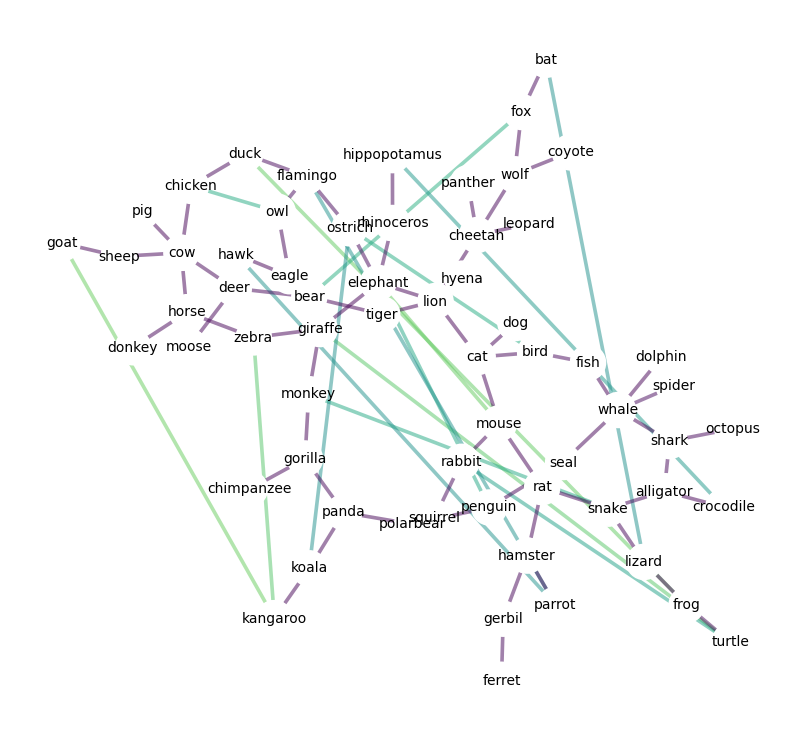

In [239]:
# f.savefig('animals.svg')
from netgraph import Graph, InteractiveGraph
from affinis.filter import threshold_edges_filter
plt.figure(figsize=(10,10))
Graph(
    # _sq(min_connected_filter(_sq(Gvals:=(_sq(evd_L)))).filled(0)),
    Gneg,
    # _sq((threshold_edges_filter(_sq(Gvals), 0.9) - Gthres.min()).filled(0)),
    # node_labels=dict(enumerate(animals.columns)),
    node_labels=True,
    # scale = (3,3),
    node_layout=nx.kamada_kawai_layout(G), 
    # node_layout_kwargs=dict(k=0.1),
    node_size=5, 
    # total_iterations=100,
    # node_labels=True,
    node_label_offset = 0.001, 
    node_edge_color='w',
    # node_shape='o',
    edge_cmap='viridis_r'
    # edge_layout='curved', 
    # edge_layout_kwargs=dict(k=0.05),
    # edge_layout='bundled'

)
plt.show()


In [241]:
from pyvis.network import Network
nt = Network('500px','500px')
nt.from_nx(G)
nt.show('nx.html')

nx.html


AttributeError: 'NoneType' object has no attribute 'render'

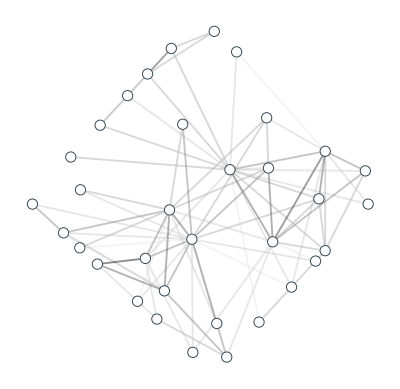

In [58]:
Graph(
    K, 
    scale=(2,2),
    node_layout="spring", 
    node_layout_kwargs=dict(k=0.5)
)

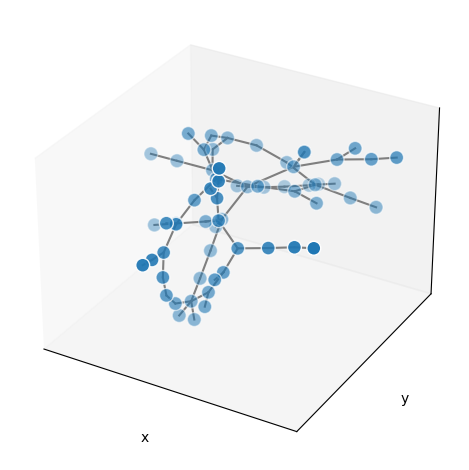

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# The graph to visualize
# G = nx.cycle_graph(20)

# 3d spring layout
pos3 = nx.spring_layout(G, dim=3)
# Extract node and edge positions from the layout
node_xyz = np.array([pos3[v] for v in sorted(G)])
edge_xyz = np.array([(pos3[u], pos3[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
# plt.show()

NameError: name 'E_obs' is not defined

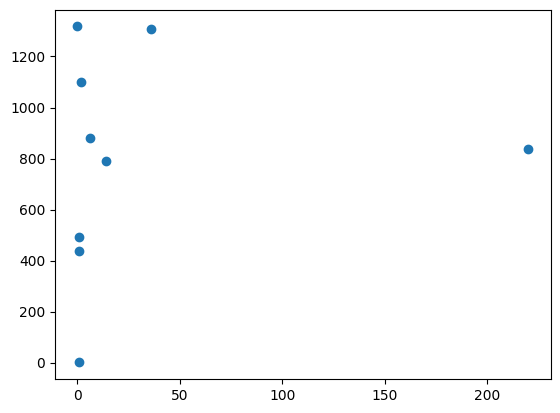

In [20]:
import scipy.stats as ss
# ss.rv_histogram(
cts,vals=np.histogram(unroll_node_obs(X).sum(axis=0), density=False, 
# bins=np.arange(unroll_node_obs(X).sum(axis=0).max())
)

plt.plot(cts[1:], robbins_cooc:=((vals[1:-1]+1)*cts[:-1]+0.5)/(cts[1:]+1), ls='', marker='o') #robbins estimate
    # , density=False).pdf(range(1000))

cts,vals=np.histogram(E_obs.sum(axis=0), density=False, 
# bins=np.arange(E_obs.sum(axis=0).max())
)
# plt.plot(cts[1:], robbins_intr:=((vals[1:-1]+1)*cts[:-1]+0.5)/(cts[1:]+1), ls='', marker='o') #robbins estimate
# plt.yscale('log')


(7.0, 0.008350344367879032)

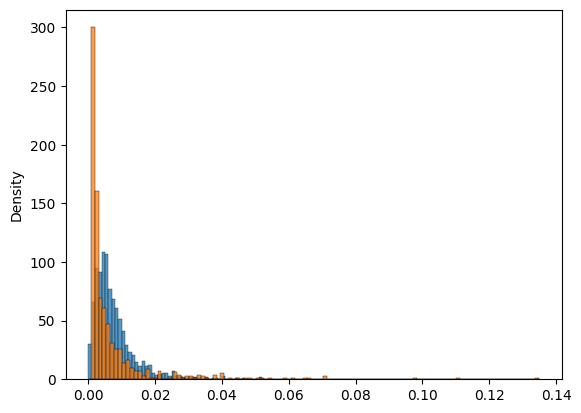

In [16]:
from scipy.stats import poisson, nbinom, dirichlet
from scipy.special import lambertw

# _sq(1-poisson(mst_post).pmf(0))/forest(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post))), beta=10)

# m = X.shape[1]*(E_obs.sum(axis=0)+0.5)/_sq(X.T@X+1)
# m = E_obs.sum(axis=0)/np.ma.masked_less(_sq(X.T@X),1)
# s = m/((E_obs>0).sum(axis=0)/np.ma.masked_less(_sq(X.T@X), 1))
# lam = (lambda s: lambertw(-s*np.exp(-s))+s)(s)
# 1-s/np.real(lam)   
# s, lam

# lambertw(-mst_post*np.exp(-mst_post))+mst_post
# mst_post
# E_obs.mean(axis=0)/E_obs.nonzero().mean(axis=0)
# (E_obs>0).mean(axis=0)
# m/((E_obs>0).sum(axis=0)/np.ma.masked_less(_sq(X.T@X), 1))
# np.real(lam)
# m
E_obs_ma = np.ma.masked_array(E_obs.todense(), mask=~(unroll_node_obs(X).astype(bool)))

bss = poisson(1).rvs((E_obs.shape[0], 1000))
m = (poisson(1).rvs((E_obs.shape[0], 1000)).sum(axis=1)*E_obs_ma.T).T.mean(axis=0)/1000
s = m/(m>0).sum(axis=0)
lam = (lambda s: lambertw(-s*np.exp(-s))+s)(s)
# 1-s/np.real(lam)   
# sns.histplot(np.real(lam))
sns.histplot(unroll_node_obs(X).sum(axis=0)/X.shape[0], stat='density')
sns.histplot(E_obs.sum(axis=0)[E_obs.sum(axis=0)>5]/X.shape[0], stat='density')
# plt.plot(poisson(unroll_node_obs(X).sum(axis=0).mean()/X.shape[0]).pmf(np.arange(200)))
# plt.plot(nbinom(7, 0.5).pmf(np.arange(50)), color='r')
# sns.histplot(E_obs.sum(axis=0)[E_obs.sum(axis=0)>0], stat='probability', discrete=True)
# lam

# sns.histplot(nbinom(4, 0.1).mean(axis=0)>0], stat='probability', discrete=True)
# lam

nbinom(7, 0.5).mean(), unroll_node_obs(X).sum(axis=0).mean()/X.shape[0]
# m
# sns.histplot((E_obs.sum(axis=0)+0.5)/(unroll_node_obs(X).sum(axis=0)+1), stat='density')
# (unroll_node_obs(X).astype(bool)).shape, E_obs.shape
# plt.yscale('log')



In [17]:
# sns.histplot(_sq(ochiai(X.shape[0]*dirichlet(4*np.ones(X.shape[0])).rvs().T*X))
ochiai(rng.choice(X, axis=0, size=1000, p=dirichlet(4*np.ones(X.shape[0])).rvs()[0]), pseudocts=0.5)
# dirichlet(4*np.ones(X.shape[0])).rvs()[0]

# ochiai(X)

array([[1.        , 0.42725825, 0.18772199, ..., 0.2149575 , 0.04922865,
        0.05379177],
       [0.42725825, 1.        , 0.23315936, ..., 0.2058011 , 0.08948682,
        0.05123052],
       [0.18772199, 0.23315936, 1.        , ..., 0.08423156, 0.11597592,
        0.00745258],
       ...,
       [0.2149575 , 0.2058011 , 0.08423156, ..., 1.        , 0.00825215,
        0.08111125],
       [0.04922865, 0.08948682, 0.11597592, ..., 0.00825215, 1.        ,
        0.04015834],
       [0.05379177, 0.05123052, 0.00745258, ..., 0.08111125, 0.04015834,
        1.        ]])

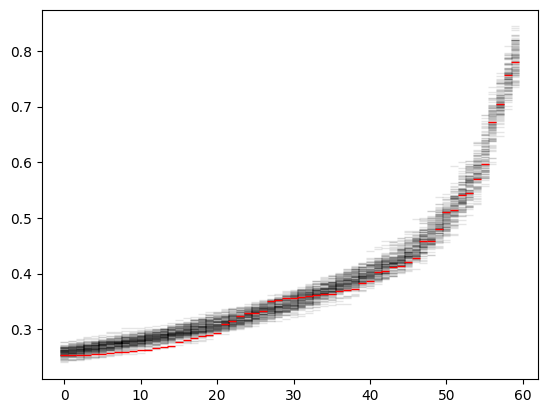

In [18]:
for i in range(100):
    plt.plot(np.sort(_sq(
        ochiai(rng.choice(X, axis=0, size=1000, p=dirichlet(4*np.ones(X.shape[0])).rvs()[0]), pseudocts=0.5)
        ))[-60:], 
        marker='_', ls='', color='k', alpha=0.1
    )
plt.plot(np.sort(_sq(ochiai(X, pseudocts=0.5)))[-60:], marker='_', ls='', color='r')

<Axes: >

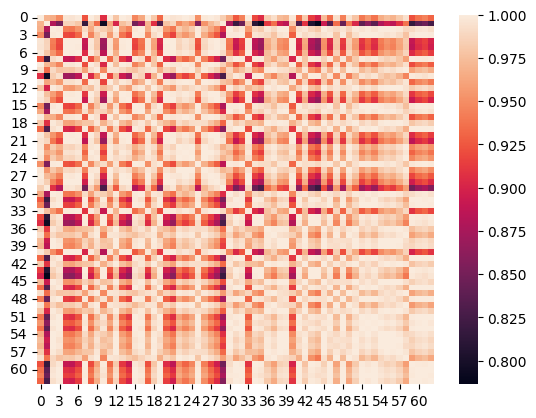

In [19]:
# from affinis.plots import hinton
from affinis.utils import minmax
from affinis.associations import _contingency_prob

a,b,c,d = _contingency_prob(X, pseudocts=0.5)

d/b, d/c, a.shape
# sns.heatmap(1/_outer(np.add, 1/X.sum(axis=0)))
# sns.heatmap(sinkhorn(_sq(post_L)))
# sns.histplot(post_L)
# sns.histplot(minmax(_sq(sinkhorn(_sq(post_L)))))
sns.heatmap((1/_outer(np.add, 1/X.sum(axis=0)))/(np.sqrt(_outer(np.multiply, X.sum(axis=0)))/2))

<Axes: >

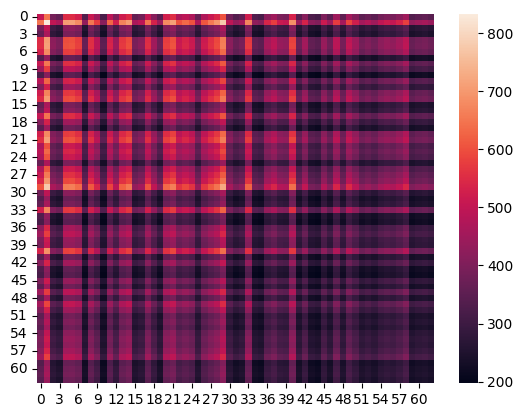

In [20]:
sns.heatmap(np.sqrt(_outer(np.multiply, X.sum(axis=0)))/2)

In [21]:
# sns.histplot(post_L, stat='density')
# sns.histplot(np.where(mst_post>0.1, mst_post, np.nan), stat='density')
# _sq(mst_post).shape
# plt.xscale('log')
# mst_post

<Axes: ylabel='Count'>

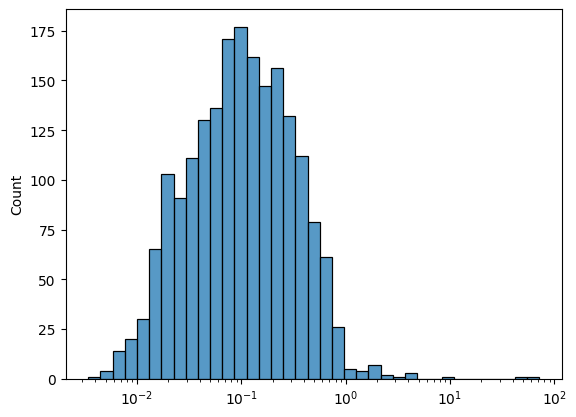

In [22]:
sns.histplot(post_L/_sq(ochiai(X, pseudocts=0.5)), log_scale=True)

In [32]:

# matplotlib.use('nbagg')

from netgraph import Graph, InteractiveGraph, EditableGraph
# %matplotlib widget
plt.figure(figsize=(15,15))

gplot=InteractiveGraph(
    _sq(min_connected_filter(_sq(Gvals)).filled(0)), 
    node_labels=True, 
    node_layout='dot', 
    # node_label_offset=0.05,
    node_size=2,
    directed=False,
)
plt.show()
# dict(zip(map(tuple, np.vstack(np.triu_indices_from(Gvals)).T.tolist()), 1-min_connected_filter(_sq(Gvals)).filled(0)))

# generalized_graph_dists(edge_mask_to_laplacian(min_connected_filter(_sq(Gvals))))

<IPython.core.display.Javascript object>

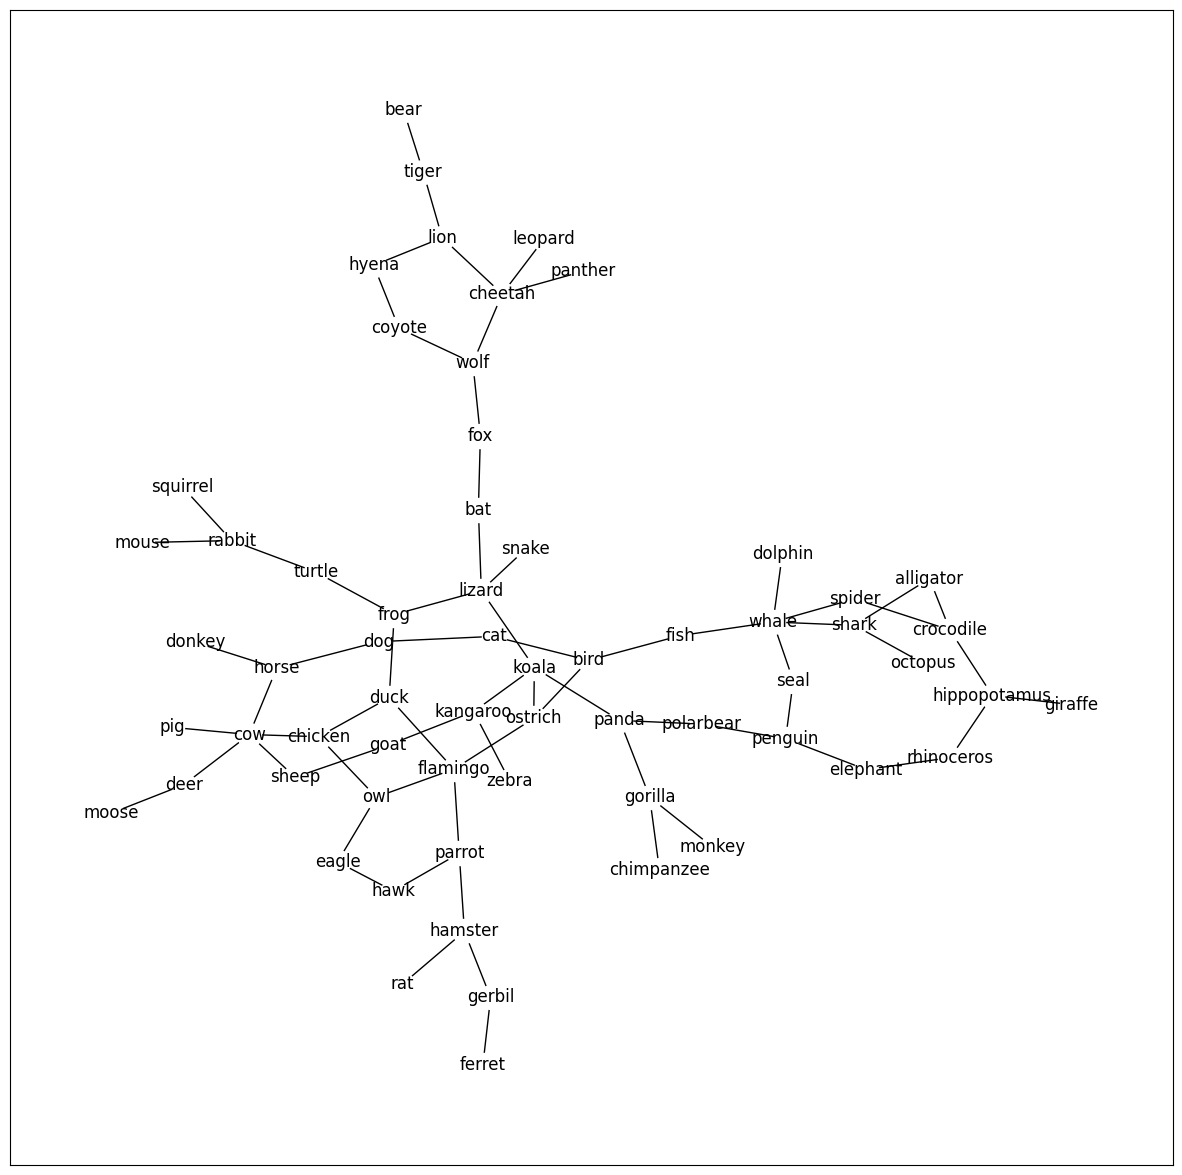

In [27]:
# sns.displot(mst_post)
# _sq(mst_post>0.1)
plt.figure(figsize=(15,15))

# G = nx.from_pandas_adjacency(pd.DataFrame((minmax(sinkhorn(_sq(post_L)))>0.7).astype(int), index=animals.columns, columns=animals.columns))
# G = nx.from_pandas_adjacency(pd.DataFrame(_sq(_sq(top_tree_pct(_sq(post_L), mult=1.5))), index=animals.columns, columns=animals.columns))

G = nx.from_pandas_adjacency(pd.DataFrame(_sq(~min_connected_filter(_sq(Gvals:=(_sq(post_L)))).mask), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')
# nx.draw_networkx_edges(G, pos=pos, edge_cmap='viridis')

In [26]:
from affinis.utils import _outer
def unroll_node_obs(X): 
    trirow, tricol = np.triu_indices(n=X.shape[1],k=1)
    return np.einsum('ij,ik->ijk', X, X)[:,trirow, tricol]
    
np.ma.array(np.multiply.outer(np.ones(roll_X.shape[0]), _sq(ochiai(roll_X))), mask=unroll_node_obs(~roll_X.astype(bool)))
# x_mask= np.ma.masked_less(X[0], 1e-3)
# x_umsk= X[0]
# %timeit _outer(np.multiply,x_mask.compressed())
# %timeit _outer(np.multiply, x_umsk)
# x_mask.

# unroll_node_obs(roll_X)[0].sum()
# np.ma.masked_array(X.astype(bool))

masked_array(
  data=[[0.40418705569182345, 0.19166467262861223, 0.03793161260281295,
         ..., --, --, --],
        [0.40418705569182345, 0.19166467262861223, 0.03793161260281295,
         ..., --, --, --],
        [--, 0.19166467262861223, 0.03793161260281295, ..., --, --, --],
        ...,
        [--, --, --, ..., --, 0.08483731055787307, 0.09947758530662153],
        [--, --, --, ..., --, 0.08483731055787307, 0.09947758530662153],
        [--, --, --, ..., 0.039126049762281005, 0.08483731055787307,
         0.09947758530662153]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ...,  True, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=1e+20)

/tmp/ipykernel_2689862/2617462368.py:6: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(nx.difference(G, Gtree),


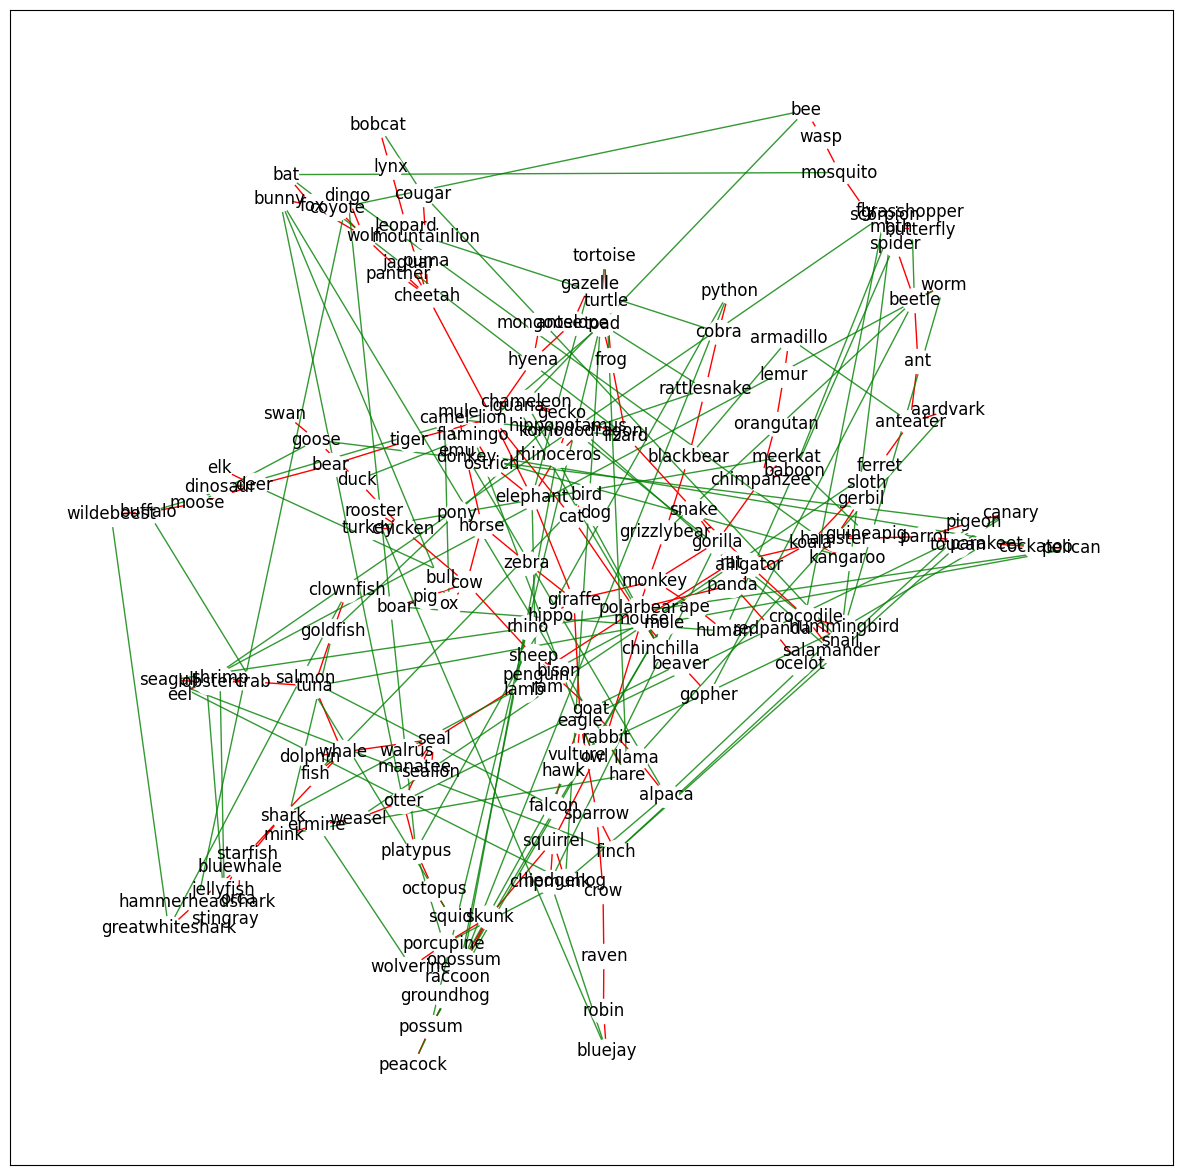

In [144]:
from scipy.sparse.csgraph import minimum_spanning_tree
plt.figure(figsize=(15,15))
Gtree = nx.from_pandas_adjacency(pd.DataFrame(minimum_spanning_tree(-Gvals).todense()<0, index=animals.columns, columns=animals.columns))
pos = nx.spring_layout(Gtree)
nx.draw_networkx(Gtree, pos=pos, node_color='w', edge_color='r')
nx.draw_networkx_edges(nx.difference(G, Gtree), 
    pos=pos, edge_color='g', alpha=0.8,
    connectionstyle="arc3,rad=0.01"  # <-- THIS IS IT
)
# nx.difference()

In [ ]:
from toolz import sliding_window
# df.query('category=="animals"').groupby(['listnum','item'])['item'].rolling(2).count()
# animals.rolling(2).sum()
(df
 .reset_index(level=1, drop=True)
 .set_index(
    df
    .groupby(level=0)
    .cumcount()
    .rename('tokenid'), 
    append=True
    )['item']
#  .groupby(['item'])['item']
 .rolling(2)
 .apply(str.join(', '))
#  .count()
#  .rolling(2)
#  .count()
#  .unique()
)

TypeError: str.join() takes exactly one argument (0 given)

In [22]:
# ochiai(roll_X)
np.cross(roll_X, roll_X)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)